<a href="https://colab.research.google.com/github/ykamen/CS4342/blob/main/CS4342_HW4_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from cvxopt import solvers, matrix
import numpy as np
import sklearn.svm
from google.colab import drive
import matplotlib.pyplot as plt

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
X = np.load('drive/MyDrive/hw4_X.npy', 'r')
y = np.load('drive/MyDrive/hw4_y.npy', 'r')

(2, 10)
(10,)


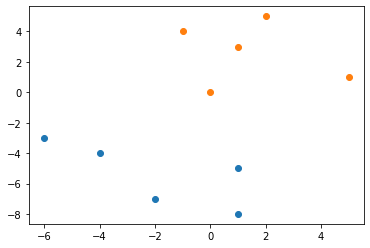

In [5]:
n = X.shape[1]//2

x = np.arange(-8, +8, 0.01)
plt.scatter(X[0,0:n], X[1,0:n])
plt.scatter(X[0,n:], X[1,n:])

Hyperplane 1 : perpendicular to [0,1]

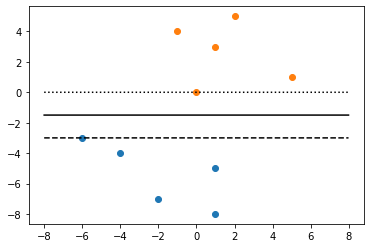

In [43]:
plt.scatter(X[0,0:n], X[1,0:n])
plt.scatter(X[0,n:], X[1,n:])

# w = [0,1]
# v = cw
# c = ?
# p1 = [0,0]
# p2 = [-6,-3]
# xt*cw + b = 1 , -1
# [0,0][0,1]c+b = 1
# [-6,-3][0,1]c+b = -1
# b = 1
# -3c + 1 = -1
# c = 2/3
# v = [0,2/3]
# H0:
# xt[0,2/3]+1 = 0
# 0*x1 + 2/3*x2 + 1 = 0
# x2 = x*0 - 3/2
# H+:
# xt[0,2/3]+2 = 0
# 2/3*x2 + 2 = 0
# x2 = x*0 - 3
# H-:
# xt[0,2/3] = 0
# x2 = x*0 - 0

plt.plot(x, x*0-3/2, 'k-')
plt.plot(x, x*0-3, 'k--')
plt.plot(x, x*0, 'k:')

plt.show()

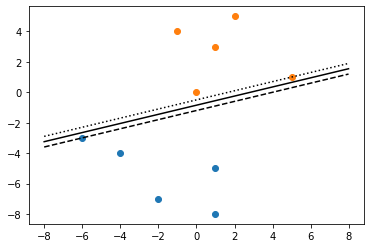

In [49]:
plt.scatter(X[0,0:n], X[1,0:n])
plt.scatter(X[0,n:], X[1,n:])

# w = [-.3,1]
# v = cw
# p+ = [5,1]
# p- = [-6,-3]
# c = ?

# xt*cw + b = 1 , -1

# H+: 
# [5,1][-.3,1]c+b = 1
# -.5c + b = 1

# H-: 
# [-6,-3][-.3,1]c+b = -1
# -1.2c + b = -1

# .7c = 2
# c = 2/.7
# c = 20/7

# b = 1 + 1/2(20/7)
# b = 17/7

w1 = 20/7*(-.3)
w2 = 20/7*1
b = 17/7

# H0:
# x2 = (-b-w1*x)/w2

# H+:
# x2 = (-b-1-w1*x)/w2

# H-:
# x2 = (-b+1-w1*x)/w2

plt.plot(x, (-b-w1*x)/w2, 'k-')
plt.plot(x, (-b-1-w1*x)/w2, 'k--')
plt.plot(x, (-b+1-w1*x)/w2, 'k:')

[[0.12123284 0.42420099]] [0.99992404]


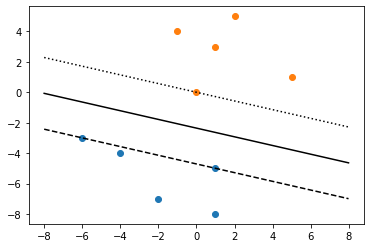

In [61]:
plt.scatter(X[0,0:n], X[1,0:n])
plt.scatter(X[0,n:], X[1,n:])

svm = sklearn.svm.SVC(kernel='linear', C=1e15)  # 1e15 -- approximate hard-margin
svm.fit(X.T, y)
print(svm.coef_, svm.intercept_)
w1 = svm.coef_[0,0]
w2 = svm.coef_[0,1]
b = svm.intercept_

plt.plot(x, (-b-w1*x)/w2, 'k-')
plt.plot(x, (-b-1-w1*x)/w2, 'k--')
plt.plot(x, (-b+1-w1*x)/w2, 'k:')

In [ ]:
class SVM4342 ():
    def __init__ (self):
        pass

    # Expects each *row* to be an m-dimensional row vector. X should
    # contain n rows, where n is the number of examples.
    # y should correspondingly be an n-vector of labels (-1 or +1).
    def fit (self, X, y):
        # TODO change these -- they should be np.arrays representing matrices or vectors
        G = 0
        h = 0
        P = 0
        q = 0

        # Solve -- if the variables above are defined correctly, you can call this as-is:
        sol = solvers.qp(matrix(P, tc='d'), matrix(q, tc='d'), matrix(G, tc='d'), matrix(h, tc='d'))

        # Fetch the learned hyperplane and bias parameters out of sol['x']
        # To avoid any annoying errors due to broadcasting issues, I recommend
        # that you flatten() the w you retrieve from the solution vector so that
        # it becomes a 1-D np.array.
        
        self.w = 0  # TODO change this
        self.b = 0  # TODO change this

    # Given a 2-D matrix of examples X, output a vector of predicted class labels
    def predict (self, x):
        return 0  # TODO fix